<a href="https://colab.research.google.com/github/Louis5228/DLP-lab/blob/main/Lab1_back_propagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
def sigmoid(x):
  return 1.0 / (1.0 + np.exp(-x))

def derivative_sigmoid(x):
  return np.multiply(x, 1.0 - x)

def generate_linear(n = 100):
  pts = np.random.uniform(0, 1, (n, 2))
  inputs = []
  labels = []
  for pt in pts:
    inputs.append([pt[0], pt[1]])
    distance = (pt[0] - pt[1]) / 1.414
    if pt[0] > pt[1]:
      labels.append(0)
    else:
      labels.append(1)
  return np.array(inputs), np.array(labels).reshape(n, 1)

def generate_XOR_easy():
  inputs = []
  labels = []
  for i in range(11):
    inputs.append([0.1*i, 0.1*i])
    labels.append(0)

    if 0.1*i == 0.5:
      continue
    
    inputs.append([0.1*i, 1 - 0.1*i])
    labels.append(1)

  return np.array(inputs), np.array(labels).reshape(21, 1)

def show_result(x, y, pred_y):
  plt.subplot(121)
  plt.title("Ground truth", fontsize=18)
  for i in range(x.shape[0]):
    if y[i] == 0:
      plt.plot(x[i][0], x[i][1], 'ro')
    else:
      plt.plot(x[i][0], x[i][1], 'bo')
  
  plt.subplot(122)
  plt.title("Predict result", fontsize=18)
  for i in range(x.shape[0]):
    if pred_y[i] < 0.5:
      plt.plot(x[i][0], x[i][1], 'ro')
    else:
      plt.plot(x[i][0], x[i][1], 'bo')
  
  plt.show()

def MSE(y_pred, t):
  return np.mean((y_pred - t)**2)

def train(epochs, lr, x, t, w1, w2, w3):
  for epoch in range(epochs):
    # Forward_propagation
    z1 = sigmoid(x.dot(w1)) #n*4
    z2 = sigmoid(z1.dot(w2)) #n*4
    y_pred = sigmoid(z2.dot(w3)) #n*1

    loss = MSE(y_pred, t)
    if epoch % 1000 == 0:
      print("epoch {:5d} loss : {:.15f}".format(epoch, loss))

    # Back_propagation
    loss_grad = t - y_pred #n*1
    d_predict_output = loss_grad * derivative_sigmoid(y_pred) #n*1
    d_hid2_output = d_predict_output.dot(w3.T) * derivative_sigmoid(z2) #n*4
    d_hid1_output = d_hid2_output.dot(w2) * derivative_sigmoid(z1) #n*4

    w3 += lr * z2.T.dot(d_predict_output) #4*1
    w2 += lr * z1.T.dot(d_hid2_output) # 4*4
    w1 += lr * x.T.dot(d_hid1_output) #2*4

  show_result(x, t, y_pred)

In [29]:
# Define number of neurons for each layer
input_Neurons = 2
hid1_Neurons = 4
hid2_Neurons = 4
output_Neurons = 1

# Random weights initialization
w1 = np.random.uniform(size=(input_Neurons, hid1_Neurons))
w2 = np.random.uniform(size=(hid1_Neurons, hid2_Neurons))
w3 = np.random.uniform(size=(hid2_Neurons, output_Neurons))

## 1. Linear dataset

epoch     0 loss : 0.419608183990557
epoch  1000 loss : 0.245704849804005
epoch  2000 loss : 0.244848220787364
epoch  3000 loss : 0.239842933124948
epoch  4000 loss : 0.045684694143680


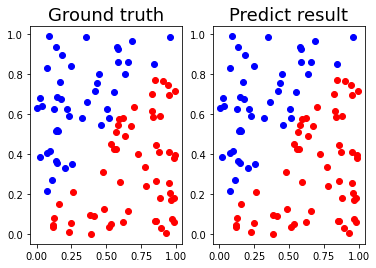

In [30]:
# Define epochs and learning rate
epochs = 5000
lr = 0.01

x, t = generate_linear(n=100)
train(epochs, lr, x, t, w1, w2, w3)

## 2. XOR dataset

epoch     0 loss : 0.328551628160725
epoch  1000 loss : 0.241237821798727
epoch  2000 loss : 0.240570716763349
epoch  3000 loss : 0.240005853039399
epoch  4000 loss : 0.239490616861513
epoch  5000 loss : 0.238968461134538
epoch  6000 loss : 0.238347029567372
epoch  7000 loss : 0.237398361984858
epoch  8000 loss : 0.235202782674691
epoch  9000 loss : 0.222337969359074
epoch 10000 loss : 0.185486531406684
epoch 11000 loss : 0.173389570187792
epoch 12000 loss : 0.138139570487452
epoch 13000 loss : 0.077436205622518
epoch 14000 loss : 0.045446589536170
epoch 15000 loss : 0.029439866337046
epoch 16000 loss : 0.020021598846614
epoch 17000 loss : 0.014207064680451
epoch 18000 loss : 0.010518992630739
epoch 19000 loss : 0.008097623522425
epoch 20000 loss : 0.006445644503752
epoch 21000 loss : 0.005275767749586
epoch 22000 loss : 0.004418859017902
epoch 23000 loss : 0.003772339226349
epoch 24000 loss : 0.003271897808909
epoch 25000 loss : 0.002875874323297
epoch 26000 loss : 0.002556441043429
e

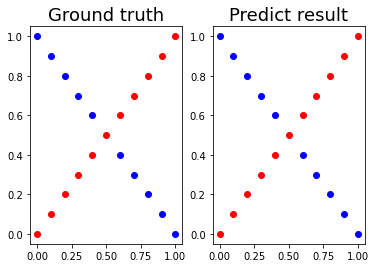

In [31]:
# Define epochs and learning rate
epochs = 50000
lr = 0.01

x, t = generate_XOR_easy()
train(epochs, lr, x, t, w1, w2, w3)